<h1>Using PCA and Naive Bayes to Observe Trends in "Machiavellianism" Amongst Different Demographics</h1>
<h2 style="color:Sea Green">Siddharth Tiwari</h2>
<h4>Quarter 4 Project</h4>

<h3>Purpose</h3>
<p> Machiavellianism, in psychology/psychometrics, is a personality trait where a "person so focused on their own interests will manipulate, deceive, and exploit others to achieve their goals." To measure this affinity for manipulation and indifference to morality, psychologists devised the <i>Mach-IV</i> test, a twenty question personality survey that is used to measure the extent at which the "Machiavellian Construct" influences an individual's actions. In this project, I see if this trait relates with different demographics, such as gender, race, religion, marital status, etc.</p>

<p>Keeping this as the main task of my project, I attempt to observe the effect of Principal component analysis (PCA) on the accuracy and runtime of classification by different algorithms. This dataset, available from the Open-Source Psychometrics Project, contains a large number of instances and features. For this reason, the runtime for these classification algorithms is influenced by the amount of data utilized by each algorithm. For this reason, I aim to answer these questions about PCA:</p>
<ul>
    <li>Can a lesser number of principal components retain similar accuracy when conducting classifications?</li>
    <li>Can a lesser number of principal components reduce the runtime of the program when conducting classifications?</li>
</ul>

<p>To classify these data, I utilize the Gaussian Naive-Bayes (NB) and k-Nearest Neighbors (KNN) algorithms.</p>

Dataset from: <a href="https://openpsychometrics.org/_rawdata/" target="_blank">https://openpsychometrics.org/_rawdata/</a>

In [10]:
#import statements

import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [11]:
#load dataset and display header
mach_df = pd.read_excel(r"data.xlsx")

<h2 style="color:#E07A5F">Describe Dataset</h2>

<h4>General Description of Dataset</h4>
<p>The following list contains descriptions of the features included in this dataset. For additional information, visit the Open Psychometrics Project (link above) or, alternatively, feel free to look through the test as well: <a href="" target="_blank"> </a> This dataset consists of: </p>
<ul>
    <li>20 Question <i>Mach-IV</i> Questionnaire.</li>
    <ul style="list-style-type='circle'">
      <li>Consists of 20 questions used to measure the presence of the "Machiavellian Construct" in the survey respondent.</li>
      <li>Three values are recorded for each question (ex. Q1):</li>
      <ul style="list-style-type='circle'">
          <li>The user's answer (ex. feature name: <b>Q1A</b>)</li>
          <li>The position of the item in the survey (ex. feature name: <b>Q1I</b>)</li>
          <li>The time spent on the question in milliseconds (ex. feature name: <b>Q1E</b>)</li>
      </ul>
    </ul>
    <li>Ten Item Personality Inventory</li>
    <ul style="list-style-type='circle'">
      <li>Ten-Item Personality Inventory was used to briefly capture the respondent's personality traits</li>
      <li>Features are labeled as <b>"TIP"</b> followed by the question number <b>(ex. TIP1)</b></li>
    </ul>
    <li>Definition Validity Checklist</li>
    <ul style="list-style-type='circle'">
        <li>This questionnaire was admitted to measure the vocabulary/critical thinking of the respondent. These features were excluded completely from classifications.</li>
    </ul>
    <li>Demographic Variables</li>
    <ul style="list-style-type='circle'">
      <li>The following information was catalogued for each respondent (and is utilized in the dataset):</li>
      <ul style="list-style-type='circle'">
          <li><b>education</b>:			"How much education have you completed?", 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree</li>
          <li><b>urban</b>:				"What type of area did you live when you were a child?", 1=Rural (country side), 2=Suburban, 3=Urban (town, city)</li>
          <li><b>gender</b>:				"What is your gender?", 1=Male, 2=Female, 3=Other</li>
          <li><b>religion</b>:			"What is your religion?", 1=Agnostic, 2=Atheist, 3=Buddhist, 4=Christian (Catholic), 5=Christian (Mormon), 6=Christian (Protestant), 7=Christian (Other), 8=Hindu, 9=Jewish, 10=Muslim, 11=Sikh, 12=Other</li>
          <li><b>orientation</b>:			"What is your sexual orientation?", 1=Heterosexual, 2=Bisexual, 3=Homosexual, 4=Asexual, 5=Other</li>
          <li><b>race	</b>:			"What is your race?", 10=Asian, 20=Arab, 30=Black, 40=Indigenous Australian, 50=Native American, 60=White, 70=Other</li>
          <li><b>married</b>:				"What is your marital status?", 1=Never married, 2=Currently married, 3=Previously married</li>
      </ul>
      <li>To see other information that was recorded for each individual, visit the codebook (attached in the zip file). The demographic variables included above are explored in the "Data Visualization" section of this project.</li>
    </ul>
    <li>Other variables:</li>
    <ul style="list-style-type='circle'">
      <li>The following features were included in this dataset but were excluded from classifications: country, screenw, screenh</li>
    </ul>
</ul><br>

The head and shape of the dataset are included below:

In [12]:
#displaying the head of the dataset
mach_df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screenw,screenh,hand,religion,orientation,race,voted,married,familysize,major
0,3.0,6.0,21017.0,3.0,7.0,18600.0,5.0,20.0,14957.0,2.0,...,1440.0,900.0,1,7,1,30,1,2,5,Marketing
1,5.0,17.0,3818.0,5.0,9.0,7850.0,1.0,16.0,5902.0,3.0,...,1536.0,864.0,1,1,1,60,2,1,2,mathematics
2,5.0,16.0,4186.0,5.0,12.0,2900.0,1.0,2.0,7160.0,1.0,...,375.0,667.0,1,2,2,10,2,1,2,Chemistry
3,2.0,12.0,9373.0,4.0,1.0,10171.0,2.0,7.0,10117.0,1.0,...,1280.0,720.0,1,6,1,60,1,3,2,international relations
4,5.0,13.0,9465.0,5.0,7.0,5284.0,2.0,19.0,8872.0,1.0,...,360.0,640.0,1,4,3,60,1,1,2,Management


In [13]:
#shape of the dataset
mach_df.shape

(73489, 105)

<h4>Independent and Dependent Variables</h4>
<p>These are the independent and dependent variables that I use in my classifications below:</p>
<ul>
    <li>X: The Mach-IV Features (Questions 1 through 20, three values) and the Ten Item Personality Inventory (Ten features)</li>
    <li>y: education, urban, gender, race, religion, married, orientation (details for these features are found above in "Describe Dataset")</li>
</ul>

<p>The data is divided into those sets and cleaned below (removing outliers and NaN values):</p>

In [14]:
#dividing into X and y sets as well as cleaning data

def divide_sets():
    
    #specifying features
    
    mach_df_f = mach_df.drop(['VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'country', 'introelapse', 'testelapse', 'surveyelapse', 'engnat', 'age', 'hand', 'voted', 'familysize', 'country', 'screenw', 'screenh','major'], axis=1)
    mach_df_f = mach_df_f.apply(pd.to_numeric)

    #remove nan and inf values
    mach_df_f = mach_df_f[~mach_df_f.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)
    
    #remove outliers and re-remove nan values
    
    mach_df_f = mach_df_f[(np.abs(stats.zscore(mach_df_f)) < 3).all(axis=1)]
    mach_df_f = mach_df_f[~mach_df_f.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)
    
    #finalize X and y
    X = mach_df_f.drop(['education', 'urban', 'gender', 'race', 'religion', 'married', 'orientation'], axis=1)
    y = mach_df_f.filter(['education', 'urban', 'gender', 'race', 'religion', 'married', 'orientation'])
    
    return X, y

X,y = divide_sets()

print("Initial shape of Dataset: ")
print(mach_df.shape)
print("")

print("Final shapes: ")
print("X: " + str(X.shape))
print("y: " + str(y.shape))

Initial shape of Dataset: 
(73489, 105)

Final shapes: 
X: (67151, 70)
y: (67151, 7)


<h3>Data Visualization: Distribution of Dependent Variables</h3>

<p>The distribution of each dependent/demographic variable is examined below to ensure some degree of heterogenuity in the subjects. As demonstrated by the figures, this dataset includes a wide variety of individuals from different demographics.</p>

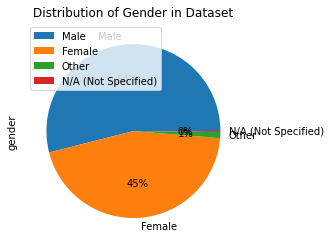

In [15]:
#gender
plt.rcParams["figure.figsize"] = [8,10]
labels = ['Male', 'Female', 'Other', 'N/A (Not Specified)']
mach_df.gender.value_counts().plot(kind='pie', title = "Distribution of Gender in Dataset", labels = labels, autopct='%1.0f%%')
plt.legend(loc='upper left')

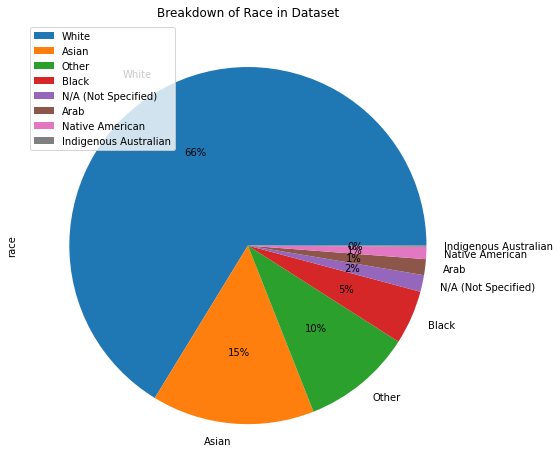

In [16]:
#race
plt.rcParams["figure.figsize"] = [8,10]
labels = ['White', 'Asian', 'Other', 'Black', 'N/A (Not Specified)', 'Arab', 'Native American', 'Indigenous Australian']
mach_df.race.value_counts().plot(kind='pie', title = "Breakdown of Race in Dataset", labels = labels, autopct='%1.0f%%')
plt.legend(loc='upper left')

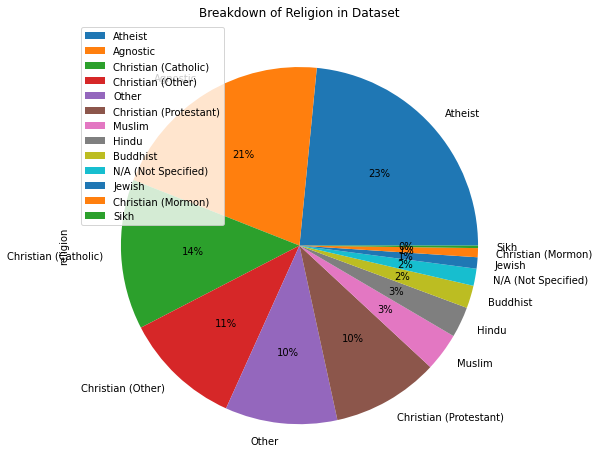

In [17]:
#religion
plt.rcParams["figure.figsize"] = [8,10]
labels = ['Atheist','Agnostic','Christian (Catholic)', 'Christian (Other)', 'Other', 'Christian (Protestant)', 'Muslim', 'Hindu', 'Buddhist', 'N/A (Not Specified)', 'Jewish', 'Christian (Mormon)', 'Sikh']
mach_df.religion.value_counts().plot(kind='pie', title = "Breakdown of Religion in Dataset", labels = labels, autopct='%1.0f%%')
plt.legend(loc='upper left')

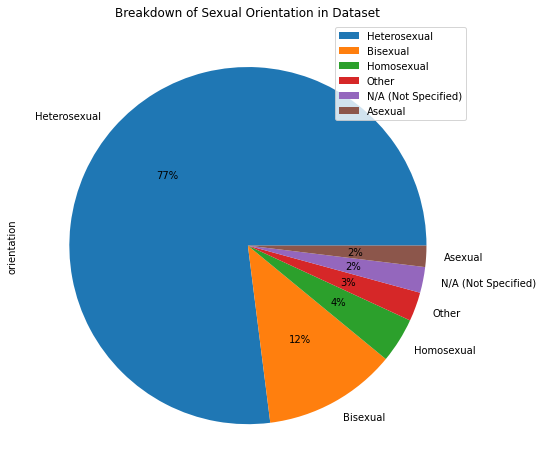

In [18]:
#sexual orientation

plt.rcParams["figure.figsize"] = [8,10]
labels = ['Heterosexual', 'Bisexual', 'Homosexual', 'Other', 'N/A (Not Specified)', 'Asexual']
mach_df.orientation.value_counts().plot(kind='pie', title = "Breakdown of Sexual Orientation in Dataset", labels = labels, autopct='%1.0f%%')
plt.legend(loc='upper right')

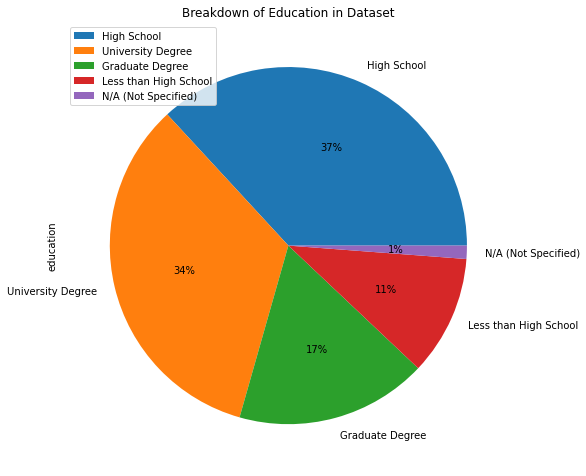

In [19]:
#education

plt.rcParams["figure.figsize"] = [8,10]
labels = ['High School', 'University Degree', 'Graduate Degree', 'Less than High School', 'N/A (Not Specified)']
mach_df.education.value_counts().plot(kind='pie', title = "Breakdown of Education in Dataset", labels = labels, autopct='%1.0f%%')
plt.legend(loc='upper left')

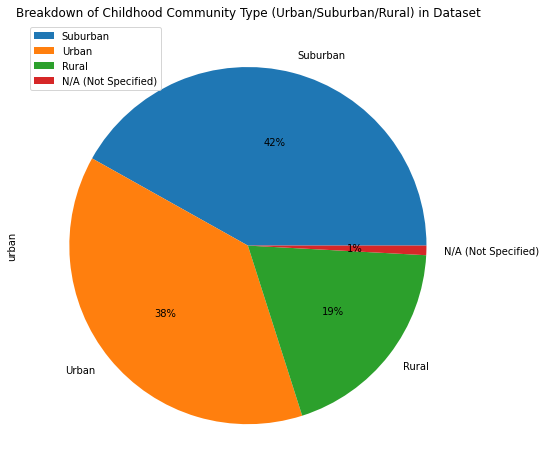

In [20]:
#urban

plt.rcParams["figure.figsize"] = [8,10]
labels = ['Suburban', 'Urban', 'Rural', 'N/A (Not Specified)']
mach_df.urban.value_counts().plot(kind='pie', title = "Breakdown of Childhood Community Type (Urban/Suburban/Rural) in Dataset", labels = labels, autopct='%1.0f%%')
plt.legend(loc='upper left')

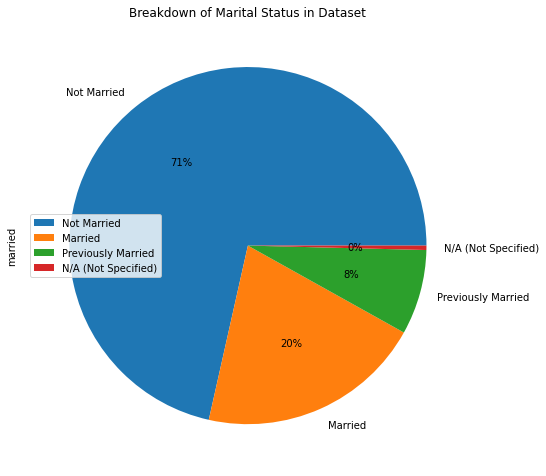

In [21]:
#married

plt.rcParams["figure.figsize"] = [8,10]
labels = ['Not Married', 'Married', 'Previously Married', 'N/A (Not Specified)']
mach_df.married.value_counts().plot(kind='pie', title = "Breakdown of Marital Status in Dataset", labels = labels, autopct='%1.0f%%')
plt.legend(loc='center left')

<h2 style="color:#E07A5F">Perform PCA</h2>

<p>In this section, I perform PCAs to observe how explained variance and the number of principal components relate with each other. By using observational analysis (such as the "elbow method") we can determine the number of principal components that are optimal for preserving variance while minimizing the amount of data utilized.</p>

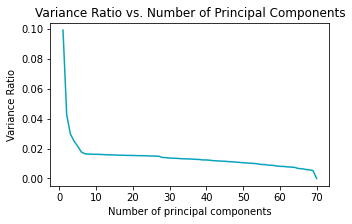

In [22]:
#set x and y
X,y = divide_sets()

#train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

#applying scaling on training and test data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#creating object of the PCA class
pca = PCA()

#training PCA model on training data
X_train = pca.fit_transform(X_train)

#making predictions on test data
X_test = pca.transform(X_test)

#printing variance ratios
plt.rcParams["figure.figsize"] = [5,3]
variance_ratios = pca.explained_variance_ratio_
x_vals = np.linspace(1,len(variance_ratios), len(variance_ratios))
plt.xlabel('Number of principal components')
plt.ylabel('Variance Ratio')
plt.title('Variance Ratio vs. Number of Principal Components')
plt.plot(x_vals, variance_ratios, color="#08A4BD", zorder = 1)

<h2 style="color:#E07A5F">Run Classifications using Different Numbers of Principal Components</h2>

<p>After observing the variance ratio with respect to the number of principal components, we can now choose a number of principal components that fits our preferences. But what is our preference? How does this number impact our calculation's accuracy and runtime? For illustrative purposes, I pick 5 different numbers of principal components to use in my classifications: 1, 2, 6, 40, and 70 (All the features). The relative variance ratios for these principal components are graphically represented below.</p>

<p>After conducting PCA using these 5 values, I use the NB and KNN algorithms to classify each feature in the "y" dataframe. This means, I conduct 14 different classifications, 7 NB and 7 KNN, for each principal component. At the end, I record the accuracy scores for each classification as well as the amount of time that all these computations required (the PCA and the 14 classifications). The accuracy scores for each classification are averaged to allow for straightforward comparisons between different numbers of principal components.</p>

Variance Ratios for Specified Principal Components:
[0.09923242215144619, 0.042675157045851765, 0.017652312267304206, 0.012341202017028045, 1.7935000237503438e-32]


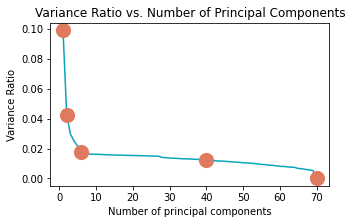

In [23]:
#a graphical representation of the different principal components being used

plt.xlabel('Number of principal components')
plt.ylabel('Variance Ratio')
plt.title('Variance Ratio vs. Number of Principal Components')
plt.plot(x_vals, variance_ratios, color="#08A4BD", zorder = 1)

plt.rcParams["figure.figsize"] = [5,3]
pca_vals = [1, 2, 6, 40, 70]
pca_vars = [variance_ratios[0], variance_ratios[1], variance_ratios[5], variance_ratios[39], variance_ratios[69]]
print("Variance Ratios for Specified Principal Components:")
print(pca_vars)
plt.scatter(pca_vals, pca_vars, s=200, color="#E07A5F", zorder = 2)

In [24]:
# using all components

#set X and y
X,y = divide_sets()

#create accuracies dataframe
index = ['NB', 'KNN']
columns = y.columns
accuracies = pd.DataFrame(index=index, columns = columns).fillna(0)

#starting timer
start = time.time()

for col in y.columns:
    #train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y[col], test_size=0.40, random_state = 0)

    #applying scaling on training and test data
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #using Naive Bayes algorithm
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracies.loc['NB', col] = accuracy_score(y_test, y_pred)
    
    #using KNN Algorithm
    knn_clf = KNeighborsClassifier(n_neighbors = 5)
    classifier = knn_clf.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracies.loc['KNN', col] = accuracy_score(y_test, y_pred)

#ending timer
end = time.time()
time_elapsed = end-start

print("Using All Data:")
print("")
print(accuracies)

print("")
print("Total Run Time: " + str(time_elapsed))

accuracies_all = []

#calculating average accuracies for each algorithm
for i in range(len(accuracies.index)):
    accuracies_all.append(sum(accuracies.iloc[i,0:6])/ len(accuracies.iloc[i, 0:6]))

print("")

print("Average Accuracies: ")
print(accuracies_all)

Using All Data:

     education     urban    gender      race  religion   married  orientation
NB    0.073378  0.080153  0.165482  0.099996  0.063773  0.396746     0.217267
KNN   0.341536  0.362756  0.603961  0.638547  0.221846  0.692826     0.775139

Total Run Time: 23.59128189086914

Average Accuracies: 
[0.1465879900227095, 0.47691200377250786]


In [25]:
# using 1 principal component

#set X and y
X,y = divide_sets()

#create accuracies dataframe
index = ['NB', 'KNN']
columns = y.columns
accuracies = pd.DataFrame(index=index, columns = columns).fillna(0)


#starting timer
start = time.time()

for col in y.columns:
    #train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y[col], test_size=0.40, random_state = 0)

    #applying scaling on training and test data
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #creating object of the PCA class
    pca = PCA(n_components = 1)

    #training PCA model on training data
    X_train = pca.fit_transform(X_train)


    #making predictions on test data
    X_test = pca.transform(X_test)
    
    #using Naive Bayes algorithm
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracies.loc['NB', col] = accuracy_score(y_test, y_pred)
    
    #using KNN Algorithm
    knn_clf = KNeighborsClassifier(n_neighbors = 5)
    classifier = knn_clf.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracies.loc['KNN', col] = accuracy_score(y_test, y_pred)


#ending timer
end = time.time()
time_elapsed = end-start

print("Using 1 Principal Component:")
print("")
print(accuracies)

print("")
print("Total Run Time: " + str(time_elapsed))

accuracies_all = []

#calculating average accuracies for each algorithm
for i in range(len(accuracies.index)):
    accuracies_all.append(sum(accuracies.iloc[i,0:6])/ len(accuracies.iloc[i, 0:6]))

print("")

print("Average Accuracies: ")
print(accuracies_all)

Using 1 Principal Component:

     education     urban    gender      race  religion   married  orientation
NB    0.377127  0.418860  0.616731  0.674807  0.246156  0.714009     0.791221
KNN   0.327799  0.360634  0.568035  0.610104  0.197908  0.680094     0.776032

Total Run Time: 5.846112012863159

Average Accuracies: 
[0.5079483265701202, 0.4574289862626113]


In [26]:
# using 2 principal components

#set X and y
X,y = divide_sets()

#create accuracies dataframe
index = ['NB', 'KNN']
columns = y.columns
accuracies = pd.DataFrame(index=index, columns = columns).fillna(0)


#starting timer
start = time.time()

for col in y.columns:
    #train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y[col], test_size=0.40, random_state = 0)

    #applying scaling on training and test data
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #creating object of the PCA class
    pca = PCA(n_components = 2)

    #training PCA model on training data
    X_train = pca.fit_transform(X_train)

    #making predictions on test data
    X_test = pca.transform(X_test)
    
    #using Naive Bayes algorithm
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracies.loc['NB', col] = accuracy_score(y_test, y_pred)
    
    #using KNN Algorithm
    knn_clf = KNeighborsClassifier(n_neighbors = 5)
    classifier = knn_clf.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracies.loc['KNN', col] = accuracy_score(y_test, y_pred)


#ending timer
end = time.time()
time_elapsed = end-start

print("Using 2 Principal Components:")
print("")
print(accuracies)

print("")
print("Total Run Time: " + str(time_elapsed))

accuracies_all = []

#calculating average accuracies for each algorithm
for i in range(len(accuracies.index)):
    accuracies_all.append(sum(accuracies.iloc[i,0:6])/ len(accuracies.iloc[i, 0:6]))

print("")

print("Average Accuracies: ")
print(accuracies_all)

Using 2 Principal Components:

     education     urban    gender      race  religion   married  orientation
NB    0.378206  0.425747  0.623246  0.666505  0.240944  0.706526     0.784036
KNN   0.332043  0.367671  0.575630  0.609843  0.199732  0.683482     0.775511

Total Run Time: 5.927759885787964

Average Accuracies: 
[0.5068624896069891, 0.46140004715634814]


In [27]:
# using 6 principal components

#set X and y
X,y = divide_sets()

#create accuracies dataframe
index = ['NB', 'KNN']
columns = y.columns
accuracies = pd.DataFrame(index=index, columns = columns).fillna(0)


#starting timer
start = time.time()

for col in y.columns:
    #train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y[col], test_size=0.40, random_state = 0)

    #applying scaling on training and test data
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #creating object of the PCA class
    pca = PCA(n_components = 6)

    #training PCA model on training data
    X_train = pca.fit_transform(X_train)

    #making predictions on test data
    X_test = pca.transform(X_test)
    
    #using Naive Bayes algorithm
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracies.loc['NB', col] = accuracy_score(y_test, y_pred)
    
    #using KNN Algorithm
    knn_clf = KNeighborsClassifier(n_neighbors = 5)
    classifier = knn_clf.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracies.loc['KNN', col] = accuracy_score(y_test, y_pred)


#ending timer
end = time.time()
time_elapsed = end-start

print("Using 6 Principal Components:")
print("")
print(accuracies)

print("")
print("Total Run Time: " + str(time_elapsed))

accuracies_all = []

#calculating average accuracies for each algorithm
for i in range(len(accuracies.index)):
    accuracies_all.append(sum(accuracies.iloc[i,0:6])/ len(accuracies.iloc[i, 0:6]))

print("")

print("Average Accuracies: ")
print(accuracies_all)

Using 6 Principal Components:

     education     urban    gender      race  religion   married  orientation
NB    0.391795  0.444697  0.635494  0.669037  0.256543  0.708350     0.783515
KNN   0.338744  0.370872  0.591080  0.620379  0.207178  0.686646     0.775027

Total Run Time: 11.003288984298706

Average Accuracies: 
[0.5176526066291899, 0.46914982068178146]


In [28]:
# using 40 principal components

#set X and y
X,y = divide_sets()

#create accuracies dataframe
index = ['NB', 'KNN']
columns = y.columns
accuracies = pd.DataFrame(index=index, columns = columns).fillna(0)


#starting timer
start = time.time()

for col in y.columns:
    #train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y[col], test_size=0.40, random_state = 0)

    #applying scaling on training and test data
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #creating object of the PCA class
    pca = PCA(n_components = 40)

    #training PCA model on training data
    X_train = pca.fit_transform(X_train)

    #making predictions on test data
    X_test = pca.transform(X_test)
    
    #using Naive Bayes algorithm
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracies.loc['NB', col] = accuracy_score(y_test, y_pred)
    
    #using KNN Algorithm
    knn_clf = KNeighborsClassifier(n_neighbors = 5)
    classifier = knn_clf.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracies.loc['KNN', col] = accuracy_score(y_test, y_pred)


#ending timer
end = time.time()
time_elapsed = end-start

print("Using 40 Principal Component:")
print("")
print(accuracies)

print("")
print("Total Run Time: " + str(time_elapsed))

accuracies_all = []

#calculating average accuracies for each algorithm
for i in range(len(accuracies.index)):
    accuracies_all.append(sum(accuracies.iloc[i,0:6])/ len(accuracies.iloc[i, 0:6]))

print("")

print("Average Accuracies: ")
print(accuracies_all)

Using 40 Principal Component:

     education     urban    gender      race  religion   married  orientation
NB    0.386173  0.446670  0.580135  0.658129  0.223000  0.698559     0.740702
KNN   0.339972  0.369346  0.598191  0.629574  0.211198  0.689885     0.775995

Total Run Time: 19.786311626434326

Average Accuracies: 
[0.4987776578186467, 0.47302780983582143]


<h3 style="color:Sea Green">Final Classification Results</h3>


<p>The table below contains a summary of the accuracy scores and runtime by number of principal components. If you run these scripts, the accuracy scores for the NB and KNN algorithms might vary slightly from the accuracies presented in the table and the runtime will vary based on the power of your processor, any background processes running on your computer, etc. The runtime values put in this table are an average of 5 different iterations of these scripts.</p>

<h4>Accuracy scores and runtime for classifications by number of principal components.</h4>

<table>
    <tr>
        <th><i>n</i> of principal components</th>
        <th>Variance Ratio</th>
        <th>Average NB accuracy score</th>
        <th>Average KNN accuracy score</th>
        <th>Runtime (in seconds)</th>
    </tr>
    <tr>
        <td>1</td>
        <td>0.0992324</td>
        <td>0.5079</td>
        <td>0.4577</td>
        <td>7.52</td>
    </tr>
    <tr>
        <td>2</td>
        <td>0.04267516</td>
        <td>0.5068</td>
        <td>0.4617</td>
        <td>8.28</td>
    </tr>
    <tr>
        <td>6</td>
        <td>0.01765231</td>
        <td>0.5179</td>
        <td>0.4696</td>
        <td>15.88</td>
    </tr>
    <tr>
        <td>40</td>
        <td>0.0123412</td>
        <td>0.4955</td>
        <td>0.4733</td>
        <td>987.21</td>
    </tr>
    <tr>
        <td>70</td>
        <td>6.0098e-33</td>
        <td>0.1466</td>
        <td>0.4769</td>
        <td>1550.99</td>
    </tr>
</table>

 
<h1>Conclusion</h1>
 
<p>As demonstrated by the results above, there is a tradeoff when using lower principal components; runtime and accuracy are both reduced by doing this. Although this is the case, six principal components yields the most optimal runtime and accuracies. With six components, we see the highest NB accuracy, a relatively high KNN accuracy, and a runtime ~98% less than that of all components. Rather than iterating through different numbers of principal components, the "elbow method" heuristic can be utilized to determine the fewest number of principal components. This can be observed in "Variance Ratio vs. Number of Principal Components (With Specific Principal Component Values)." For this reason, utilizing PCA can produce similar accuracies while reducing runtimes.</p>